In [1]:
from datatype.training_dataset import Mydataset
use_reduced_passage_vec = False
mds = Mydataset(use_reduced_passage_vec=use_reduced_passage_vec)
sample_news = """Meta, formerly known as Facebook, has issued new guidelines for its return-to-office policy, requiring employees to be in their assigned offices most of the week. Attendance will be monitored and tracked, and those who do not comply may face termination or negative performance reviews. The company's CEO, Mark Zuckerberg, has shifted his stance on remote work and is now implementing a more aggressive return-to-office mandate. The new policy is similar to Amazon's and Google's, both of which require employees to work in-office at least three days a week."""

Hash Code: d6584ebc7b834c41be20f958e036f1a1


In [63]:
time_effect_factor = 48*60*60*1000
input_vec = mds.get_vector_data_from_text(sample_news)
time_effects_20h = []
time_effects_20h_h = []
for i in range(1, 21):
    time_effects_20h.append((i*60*1000 / time_effect_factor) * 10000)
    time_effects_20h_h.append(i)


time_effects_20h[19] = 10000000


In [3]:
input_vec[0][2]

tensor([0.0003])

In [64]:
input_vec_list = []
for i in time_effects_20h:
    each_vec = ((input_vec[0][0].unsqueeze(0), input_vec[0][1].unsqueeze(0), (input_vec[0][2] + i).unsqueeze(0)), input_vec[1])
    input_vec_list.append(each_vec)

In [5]:
input_vec_list[0][0][2]

tensor([0.0006])

In [6]:
input_vec_list[2][0][2]

tensor([0.0013])

In [8]:
timestr = mds.get_timestr_from_text_data(sample_news)

In [9]:
timestr

'2023-08-18T21:54:15.999516+00:00'

In [10]:
from datetime import datetime, timedelta

# The given timestamp string
timestamp_str = '2023-08-18T21:54:15.999516+00:00'

# Convert the string to a datetime object
timestamp_dt = datetime.strptime(timestamp_str, '%Y-%m-%dT%H:%M:%S.%f%z')
timestamp_dt

datetime.datetime(2023, 8, 18, 21, 54, 15, 999516, tzinfo=datetime.timezone.utc)

In [13]:
dt_list = []
for i in time_effects_20h_h:
    curr_time = timestamp_dt + timedelta(hours=i)
    dt_list.append(curr_time)
    

In [14]:
dt_list

[datetime.datetime(2023, 8, 18, 22, 54, 15, 999516, tzinfo=datetime.timezone.utc),
 datetime.datetime(2023, 8, 18, 23, 54, 15, 999516, tzinfo=datetime.timezone.utc),
 datetime.datetime(2023, 8, 19, 0, 54, 15, 999516, tzinfo=datetime.timezone.utc),
 datetime.datetime(2023, 8, 19, 1, 54, 15, 999516, tzinfo=datetime.timezone.utc),
 datetime.datetime(2023, 8, 19, 2, 54, 15, 999516, tzinfo=datetime.timezone.utc),
 datetime.datetime(2023, 8, 19, 3, 54, 15, 999516, tzinfo=datetime.timezone.utc),
 datetime.datetime(2023, 8, 19, 4, 54, 15, 999516, tzinfo=datetime.timezone.utc),
 datetime.datetime(2023, 8, 19, 5, 54, 15, 999516, tzinfo=datetime.timezone.utc),
 datetime.datetime(2023, 8, 19, 6, 54, 15, 999516, tzinfo=datetime.timezone.utc),
 datetime.datetime(2023, 8, 19, 7, 54, 15, 999516, tzinfo=datetime.timezone.utc),
 datetime.datetime(2023, 8, 19, 8, 54, 15, 999516, tzinfo=datetime.timezone.utc),
 datetime.datetime(2023, 8, 19, 9, 54, 15, 999516, tzinfo=datetime.timezone.utc),
 datetime.date

In [36]:
from training_pipeline import StockPredictionModel
import torch
import torch.nn as nn
config = {
    "passage vector size": 768,
    "time_features": 3,  # Assuming time_features is 3 for this example
    "d_model": 1024,
    "output_size": 6,  # Define your model's output size
    "nhead": 4,
    "transformer encoder layer num": 15,
}
model = StockPredictionModel(passage_vec_size=config["passage vector size"],
                             time_features=config["time_features"],
                             d_model=config["d_model"],
                             output_size=config["output_size"],
                             nhead=config["nhead"],
                             transformer_encoder_layer_num=config["transformer encoder layer num"])
model_path = "model/check_points/2024-01-30-21@07@41-UTC+0000_25/checkpoint_epoch_8_step_7000.pth"

checkpoint = torch.load(model_path, map_location=torch.device('mps'))
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

device = torch.device("mps")
model.to(device)

/Users/ray/.pyenv/versions/3.10.13/envs/lee_ml_class/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


StockPredictionModel(
  (linear1): Linear(in_features=772, out_features=1024, bias=True)
  (transformer_encoder_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
    )
    (linear1): Linear(in_features=1024, out_features=2048, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=2048, out_features=1024, bias=True)
    (norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-14): 15 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
        )
        (linear1): Linear(in_

In [16]:
import plotly.graph_objs as go
import plotly.express as px

In [27]:
input_vec_list[5][0][1]

tensor([1.0000, 0.0034, 0.0000])

In [31]:
input_vec[0][0].shape

torch.Size([768])

In [65]:
result_vec_list = []
for i in input_vec_list:
    input_tensors = [tensor.to(device) for tensor in i[0]]
    r = model(*input_tensors)
    print(input_tensors[2])
    result_vec_list.append(r)

tensor([[3.4725]], device='mps:0')
tensor([[6.9447]], device='mps:0')
tensor([[10.4169]], device='mps:0')
tensor([[13.8891]], device='mps:0')
tensor([[17.3614]], device='mps:0')
tensor([[20.8336]], device='mps:0')
tensor([[24.3058]], device='mps:0')
tensor([[27.7780]], device='mps:0')
tensor([[31.2503]], device='mps:0')
tensor([[34.7225]], device='mps:0')
tensor([[38.1947]], device='mps:0')
tensor([[41.6669]], device='mps:0')
tensor([[45.1391]], device='mps:0')
tensor([[48.6114]], device='mps:0')
tensor([[52.0836]], device='mps:0')
tensor([[55.5558]], device='mps:0')
tensor([[59.0280]], device='mps:0')
tensor([[62.5003]], device='mps:0')
tensor([[65.9725]], device='mps:0')
tensor([[10000000.]], device='mps:0')


In [66]:
result_vec_list

[tensor([[0.0086, 0.0105, 0.0015, 0.0144, 0.0182, 0.0508]], device='mps:0',
        grad_fn=<LinearBackward0>),
 tensor([[0.0086, 0.0105, 0.0015, 0.0144, 0.0182, 0.0508]], device='mps:0',
        grad_fn=<LinearBackward0>),
 tensor([[0.0086, 0.0105, 0.0015, 0.0144, 0.0182, 0.0508]], device='mps:0',
        grad_fn=<LinearBackward0>),
 tensor([[0.0086, 0.0105, 0.0015, 0.0144, 0.0182, 0.0508]], device='mps:0',
        grad_fn=<LinearBackward0>),
 tensor([[0.0086, 0.0105, 0.0015, 0.0144, 0.0182, 0.0508]], device='mps:0',
        grad_fn=<LinearBackward0>),
 tensor([[0.0086, 0.0105, 0.0015, 0.0144, 0.0182, 0.0508]], device='mps:0',
        grad_fn=<LinearBackward0>),
 tensor([[0.0086, 0.0105, 0.0015, 0.0144, 0.0182, 0.0508]], device='mps:0',
        grad_fn=<LinearBackward0>),
 tensor([[0.0086, 0.0105, 0.0015, 0.0144, 0.0182, 0.0508]], device='mps:0',
        grad_fn=<LinearBackward0>),
 tensor([[0.0086, 0.0105, 0.0015, 0.0144, 0.0182, 0.0508]], device='mps:0',
        grad_fn=<LinearBackw

In [40]:
# change_rate = float((float(stock_price_next) - float(stock_price_curr)) / float(stock_price_curr)) * 100.0

In [58]:
def get_next_price(r, c): #chagne rate and current price
    return 100*c / (100 - r)

In [42]:
#stock price at 16:54:15.999516: 282.8550
#TODO: might have some improvement for stock data

In [59]:
predicted_list = []
for i in result_vec_list:
    fluc = i[0, 0].item()
    price = get_next_price(fluc, 282.8550)
    predicted_list.append(price)

In [60]:
predicted_list

[282.8794562302637,
 282.8794562302637,
 282.8794562302637,
 282.8794562302637,
 282.87945622762896,
 282.8794562302637,
 282.8794562302637,
 282.8794562302637,
 282.8794562302637,
 282.8794562302637,
 282.87945622762896,
 282.8794562302637,
 282.8794562302637,
 282.8794562302637,
 282.8794562302637,
 282.8794562302637,
 282.8794562302637,
 282.87945622762896,
 282.8794562302637,
 282.8794562302637]

In [72]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'Date': dt_list,
    'Stock Price': unique_numbers
})

In [70]:
import random

# Generate a list of 20 unique random numbers between 1 and 100
unique_numbers = random.sample(range(1, 1010), 20)

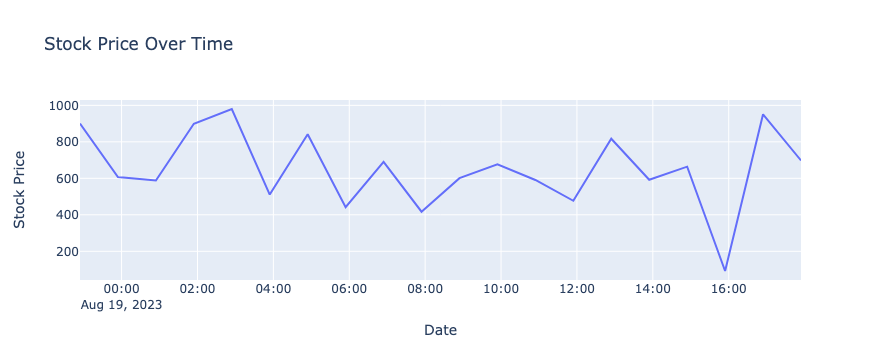

In [73]:
import plotly.express as px

# Create a line plot
fig = px.line(df, x='Date', y='Stock Price', title='Stock Price Over Time')

# Show the plot
fig.show()